# Strategy and Result

##  Basic Invesment Strategy

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None

In [ ]:
train_sp = pd.read_parquet('./drive/MyDrive/WQU/690/golden/sp500_train.parquet')
test_sp = pd.read_parquet('./drive/MyDrive/WQU/690/golden/sp500_test.parquet')

train_csi = pd.read_parquet('./drive/MyDrive/WQU/690/golden/csi300_train.parquet')
test_csi = pd.read_parquet('./drive/MyDrive/WQU/690/golden/csi300_test.parquet')

In [ ]:
# @TODO : stock list vao trong hoac sau khoang thoi gian lay tap du lieu -> nan.
train_sp = train_sp.dropna()
test_sp = test_sp.dropna()

In [ ]:
X_train = train_sp.drop(columns=['GB'])
y_train = train_sp['GB']

X_test = test_sp.drop(columns=['GB'])
y_test = test_sp['GB']

In [ ]:
X_train.head()

,Sticker,Date,return_1,return_2,return_3,return_4,return_5,return_6,return_7,return_8,...,return_60,return_80,return_100,return_120,return_140,return_160,return_180,return_200,return_220,return_240
1256,A,2017-01-03,-0.001753,-0.000614,-0.017589,-0.010997,-0.006049,-0.007560,-0.011211,0.005766,...,-0.030924,-0.027692,-0.034659,-0.015572,0.022398,0.077572,0.122613,0.172284,0.238479,0.236153
1257,A,2017-01-04,0.020413,0.018624,0.019786,0.002465,0.009191,0.014240,0.012698,0.008973,...,-0.014279,-0.005945,-0.016198,0.007120,0.043501,0.091374,0.134437,0.169426,0.255321,0.262402
1258,A,2017-01-05,0.013121,0.033801,0.031990,0.033167,0.015618,0.022433,0.027548,0.025986,...,-0.003031,0.055119,-0.016128,0.011832,0.056486,0.069095,0.146823,0.200906,0.252062,0.253710
1259,A,2017-01-06,-0.011890,0.001075,0.021510,0.019719,0.020883,0.003542,0.010276,0.015330,...,-0.021289,0.022747,-0.028029,0.002586,0.034031,0.058528,0.129913,0.179783,0.265799,0.250991
1260,A,2017-01-09,0.031156,0.018896,0.032265,0.053336,0.051490,0.052690,0.034809,0.041753,...,0.053380,0.074577,-0.003953,0.030951,0.066482,0.085629,0.153724,0.229178,0.294441,0.293406


# Model Training

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from keras.utils import to_categorical
from xgboost import XGBClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

In [ ]:
def train_dnn(X_train, y_train):
    # Ensure TensorFlow uses the GPU if available
    physical_devices = tf.config.list_physical_devices('GPU')
    if physical_devices:
        try:
            tf.config.experimental.set_memory_growth(physical_devices[0], True)
            tf.config.set_visible_devices(physical_devices[0], 'GPU')
            print("Using GPU:", physical_devices[0])
        except RuntimeError as e:
            print(e)
    else:
        print("No GPU found, using CPU instead.")

    model = Sequential()
    model.add(Dense(31, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(31, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

    model.fit(X_train, y_train, epochs=400, batch_size=64, validation_split=0.2, callbacks=[early_stopping], verbose=1)

    return model


def train_random_forest(X_train, y_train):
    model = RandomForestClassifier(n_estimators=800, max_depth=20, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    return model

def train_xgboost(X_train, y_train):
    model = XGBClassifier(n_estimators=1000, max_depth=10, learning_rate=0.03, random_state=42, tree_method='hist')
    model.fit(X_train, y_train)
    return model

def train_svm(X_train, y_train):
    model = SVC(C=3000, gamma=0.8, probability=True)
    model.fit(X_train, y_train)
    return model

In [ ]:
# dnn_model = train_dnn(X_train.drop(columns=['Sticker', 'Date']), y_train)
# raf_model = train_random_forest(X_train.drop(columns=['Sticker', 'Date']), y_train)
# xgb_model = train_xgboost(X_train.drop(columns=['Sticker', 'Date']), y_train)
# svm_model = train_svm(X_train, y_train)

In [ ]:
import pickle

# with open('./drive/MyDrive/WQU/690/files/dnn_model.pkl', 'wb') as f:
#     pickle.dump(dnn_model, f)

# with open('./drive/MyDrive/WQU/690/files/raf_model.pkl', 'wb') as f:
#     pickle.dump(raf_model, f)

# with open('./drive/MyDrive/WQU/690/files/xgb_model.pkl', 'wb') as f:
#     pickle.dump(xgb_model, f)

# Inference

In [ ]:
s, m, e = 2017, 2020, 2021

In [ ]:
!pip install scikit-learn==1.2.2

In [ ]:
import pickle
import pandas as pd
import numpy as np


In [ ]:
outsample = pd.read_parquet('./drive/MyDrive/WQU/690/raw/sp500.parquet')['Adj Close']

daily_returns = outsample.pct_change() # TODO check again
daily_returns = daily_returns[(daily_returns.index.year >= m) & (daily_returns.index.year < e)]

In [ ]:
import numpy as np
import pandas as pd
import pickle

class Inference():
    def __init__(self, fee=False):
        with open('./drive/MyDrive/WQU/690/files/dnn_model.pkl', 'rb') as f:
            self.dnn_model = pickle.load(f)

        with open('./drive/MyDrive/WQU/690/files/xgb_model.pkl', 'rb') as f:
            self.xgb_model = pickle.load(f)

        with open('./drive/MyDrive/WQU/690/files/raf_model.pkl', 'rb') as f:
            self.raf_model = pickle.load(f)

        self.models = {
            'DNN': self.dnn_model,
            'RAF': self.raf_model,
            'XGB': self.xgb_model
        }

        self.full = None
        self.fee = fee

    def predict_proba(self, frame):
        r = {}
        tmp = frame.drop(columns=['Sticker'])
        for name, model in self.models.items():
            if name == 'DNN':
                r[name] = model.predict(tmp)
            else:
                r[name] = model.predict_proba(tmp)[:, 1]
        return r

    def select_bottom_stocks(self, dataframe, n):
        bottom_stocks = dataframe.apply(lambda row: row.nsmallest(n).index.tolist(), axis=1)
        return bottom_stocks

    def select_top_stocks(self, dataframe, n):
        top_stocks = dataframe.apply(lambda row: row.nlargest(n).index.tolist(), axis=1)
        return top_stocks

    def trigger(self, frame):
        r = self.predict_proba(frame)
        rr = frame.copy()
        for name, prediction in r.items():
            rr[name] = prediction

        return {
            name: rr.pivot_table(columns='Sticker', index='Date', values=name) for name in r.keys()
        }

    def calculate_metrics(self, daily_portfolio_return):
        daily_portfolio_return = np.array(daily_portfolio_return)

        # Calculate Annualized Return
        annualized_return = np.prod(1 + daily_portfolio_return) ** (252 / len(daily_portfolio_return)) - 1

        # Calculate Standard Deviation
        std_dev = np.std(daily_portfolio_return) * np.sqrt(252)

        # Calculate Sharpe Ratio
        sharpe_ratio = annualized_return / std_dev

        return annualized_return, std_dev, sharpe_ratio

    def run(self, frame, daily_returns, n_values):
        results = {}
        self.full = self.trigger(frame)
        for n in n_values:
            bottom_ = {k: self.select_bottom_stocks(v, n) for k, v in self.full.items()}
            top_ = {k: self.select_top_stocks(v, n) for k, v in self.full.items()}
            for name in self.models.keys():
                daily_portfolio_return = []
                transaction_cost = 0.0005

                for date in daily_returns.index[:-1]:
                    top_stocks = top_[name].loc[date]
                    bottom_stocks = bottom_[name].loc[date]
                    long_returns = daily_returns.loc[date, top_stocks].mean()
                    short_returns = daily_returns.loc[date, bottom_stocks].mean()

                    portfolio_return = long_returns - short_returns - transaction_cost * int(self.fee == True)
                    daily_portfolio_return.append(portfolio_return)

                ann_return, std_dev, sharpe_ratio = self.calculate_metrics(daily_portfolio_return[1:])
                if name not in results:
                    results[name] = {}
                results[name][n] = {
                    'Annualized Return': ann_return,
                    'Standard Deviation': std_dev,
                    'Sharpe Ratio': sharpe_ratio
                }
        return results


In [ ]:
inference = Inference(fee=True)
results_fee = inference.run(X_test.set_index('Date'), daily_returns, [10, 20, 50])

inference = Inference(fee=False)
results_nofee = inference.run(X_test.set_index('Date'), daily_returns, [10, 20, 50])

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:35:49] WARNING: /workspace/src/collective/../data/../common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)


3882/3882 [==============================] - 6s 1ms/step


In [ ]:
numbers = [10, 20, 50]
pip = {}

for number in numbers:
  p1 = []
  for alg, rtb in results_nofee.items():
      tpm = pd.DataFrame([rtb[number]]).T
      tpm.columns = [alg]
      p1.append(tpm)

  tpm2 = pd.concat(p1, axis=1)

  p1 = []
  for alg, rtb in results_fee.items():
      tpm = pd.DataFrame([rtb[number]]).T
      tpm.columns = [alg]
      p1.append(tpm)

  tpm3 = pd.concat(p1, axis=1)

  columns = pd.MultiIndex.from_product([['Before Fees', 'After Fees'], tpm2.columns])
  combined_df = pd.concat([tpm2, tpm3], axis=1)
  combined_df.columns = columns
  print(f'Number of stocks: {number}')
  display(combined_df)
  pip[number] = combined_df

Number of stocks: 10


Before Fees                     After Fees            \
                           DNN       RAF       XGB        DNN       RAF   
Annualized Return    -0.042412  0.988423  1.139627  -0.155869  0.753491   
Standard Deviation    0.451802  0.428141  0.320111   0.451802  0.428141   
Sharpe Ratio         -0.093874  2.308637  3.560105  -0.344995  1.759911   

                              
                         XGB  
Annualized Return   0.886937  
Standard Deviation  0.320111  
Sharpe Ratio        2.770722

Number of stocks: 20


Before Fees                     After Fees            \
                           DNN       RAF       XGB        DNN       RAF   
Annualized Return    -0.040896  1.071525  1.187252  -0.154522  0.826845   
Standard Deviation    0.392595  0.328765  0.273642   0.392595  0.328765   
Sharpe Ratio         -0.104167  3.259240  4.338698  -0.393591  2.515002   

                              
                         XGB  
Annualized Return   0.928971  
Standard Deviation  0.273642  
Sharpe Ratio        3.394837

Number of stocks: 50


Before Fees                     After Fees            \
                           DNN       RAF       XGB        DNN       RAF   
Annualized Return    -0.024483  0.660041  0.789679  -0.140031  0.463815   
Standard Deviation    0.309788  0.268274  0.203521   0.309788  0.268274   
Sharpe Ratio         -0.079033  2.460327  3.880091  -0.452022  1.728889   

                              
                         XGB  
Annualized Return   0.578200  
Standard Deviation  0.203521  
Sharpe Ratio        2.840992

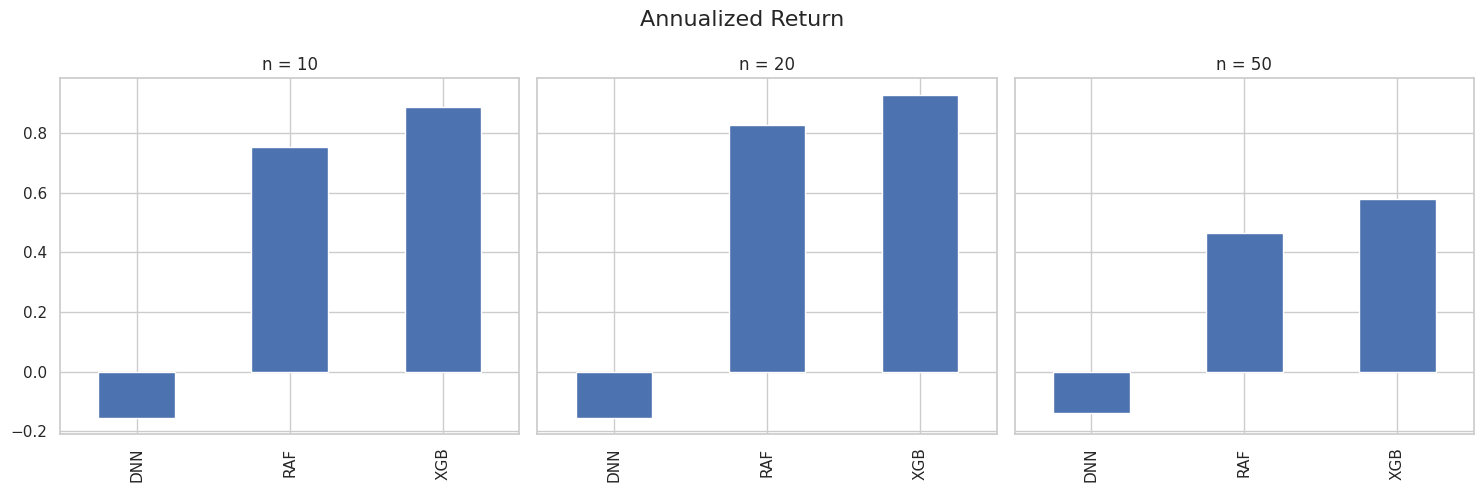

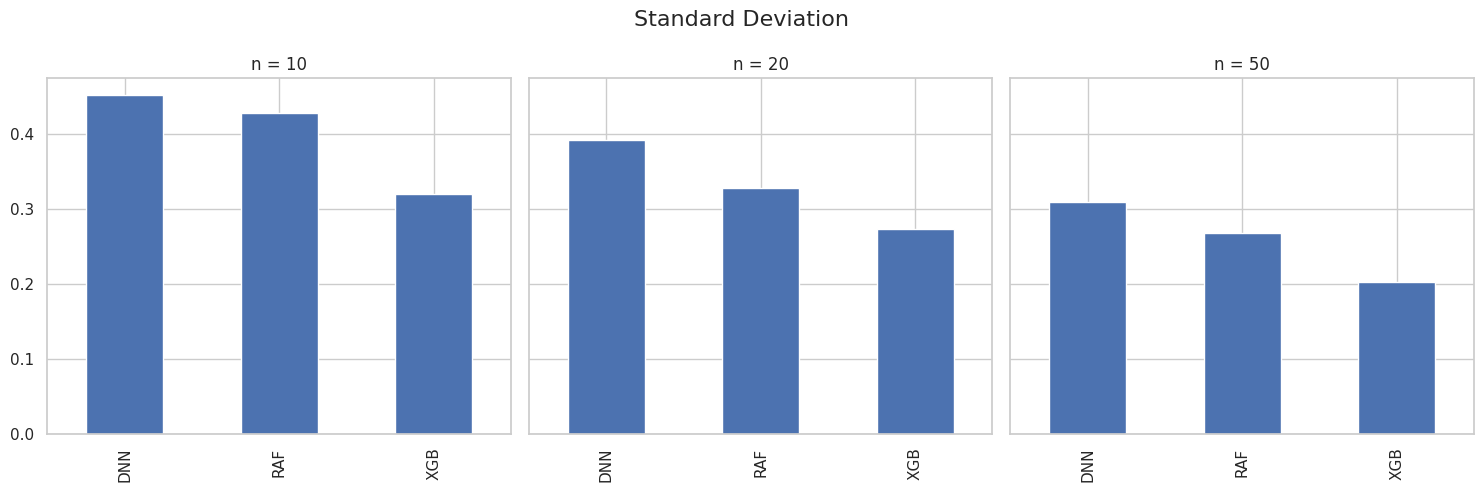

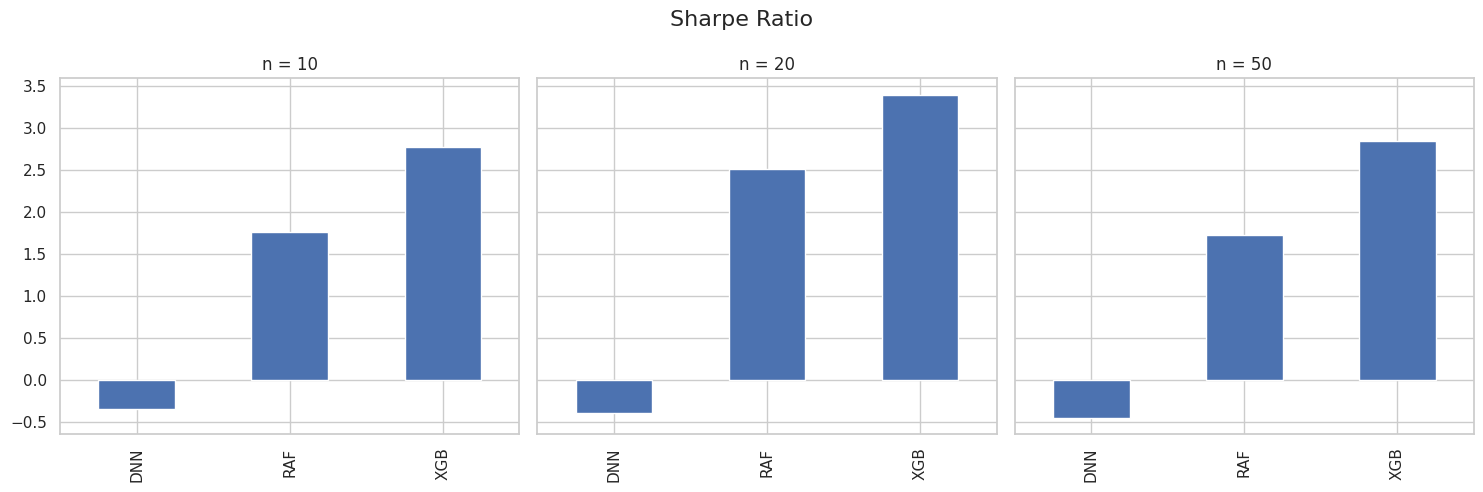

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# city = 'Annualized Return'
for city in ['Annualized Return', 'Standard Deviation', 'Sharpe Ratio']:
    l1 = []
    for number in numbers:
        r1 = pip[number]['After Fees'].loc[city]
        r1.name = number
        l1.append(r1)

    df_tmp_plot = pd.DataFrame(l1)

    sns.set(style="whitegrid")
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

    df_tmp_plot.loc[10].plot(kind='bar', ax=axes[0])
    axes[0].set_title('n = 10')
    # axes[0].set_ylim(-0.2, 1)

    # Plot DataFrame 'b'
    df_tmp_plot.loc[20].plot(kind='bar', ax=axes[1])
    axes[1].set_title('n = 20')

    # Plot DataFrame 'c'
    df_tmp_plot.loc[50].plot(kind='bar', ax=axes[2])
    axes[2].set_title('n = 50')

    fig.suptitle(f'{city}', fontsize=16)

    # Show the plot
    plt.tight_layout()
    plt.show()

# **4.2**

In [ ]:
import numpy as np
import pandas as pd
import pickle

class Inference3():
    def __init__(self, fee=False):
        with open('./drive/MyDrive/WQU/690/files/dnn_model.pkl', 'rb') as f:
            self.dnn_model = pickle.load(f)

        with open('./drive/MyDrive/WQU/690/files/xgb_model.pkl', 'rb') as f:
            self.xgb_model = pickle.load(f)

        with open('./drive/MyDrive/WQU/690/files/raf_model.pkl', 'rb') as f:
            self.raf_model = pickle.load(f)

        self.models = {
            'DNN': self.dnn_model,
            'RAF': self.raf_model,
            'XGB': self.xgb_model
        }
        self.fee = fee

    def predict_proba(self, frame):
        r = {}
        tmp = frame.drop(columns=['Sticker'])
        for name, model in self.models.items():
            if name == 'DNN':
                r[name] = model.predict(tmp)
            else:
                r[name] = model.predict_proba(tmp)[:, 1]
        return r

    def select_bottom_stocks(self, dataframe, n):
        bottom_stocks = dataframe.apply(lambda row: row.nsmallest(n).index.tolist(), axis=1)
        return bottom_stocks

    def select_top_stocks(self, dataframe, n):
        top_stocks = dataframe.apply(lambda row: row.nlargest(n).index.tolist(), axis=1)
        return top_stocks

    def trigger(self, frame):
        r = self.predict_proba(frame)
        rr = frame.copy()
        for name, prediction in r.items():
            rr[name] = prediction

        return {
            name: rr.pivot_table(columns='Sticker', index='Date', values=name) for name in r.keys()
        }

    def calculate_metrics(self, daily_portfolio_return):
        daily_portfolio_return = np.array(daily_portfolio_return)

        # Calculate Annualized Return
        annualized_return = np.prod(1 + daily_portfolio_return) ** (252 / len(daily_portfolio_return)) - 1

        # Calculate Standard Deviation
        std_dev = np.std(daily_portfolio_return) * np.sqrt(252)

        # Calculate Sharpe Ratio
        sharpe_ratio = annualized_return / std_dev

        return annualized_return, std_dev, sharpe_ratio

    def run(self, frame, daily_returns, n_values):
        results = {}
        full = self.trigger(frame)
        for n in n_values:
            bottom_ = {k: self.select_bottom_stocks(v, n) for k, v in full.items()}
            top_ = {k: self.select_top_stocks(v, n) for k, v in full.items()}
            for name in self.models.keys():
                for strategy in ['normal', 'day']:
                    daily_portfolio_return = []
                    transaction_cost = 0.0005

                    for date in daily_returns.index[:-1]:
                        if strategy == 'day':
                            next_date = daily_returns.index[daily_returns.index.get_loc(date) + 1]
                            top_stocks = top_[name].loc[date]
                            bottom_stocks = bottom_[name].loc[date]
                            long_returns = daily_returns.loc[next_date, top_stocks].mean()
                            short_returns = daily_returns.loc[next_date, bottom_stocks].mean()
                        elif strategy == 'normal':
                            top_stocks = top_[name].loc[date]
                            bottom_stocks = bottom_[name].loc[date]
                            open_prices = daily_returns.loc[date, top_stocks].mean()
                            close_prices = daily_returns.loc[date, bottom_stocks].mean()
                            long_returns = daily_returns.loc[date, top_stocks].mean()
                            short_returns = daily_returns.loc[date, bottom_stocks].mean()

                        portfolio_return = long_returns - short_returns - transaction_cost * int(self.fee == True)
                        daily_portfolio_return.append(portfolio_return)

                    ann_return, std_dev, sharpe_ratio = self.calculate_metrics(daily_portfolio_return[1:])
                    if name not in results:
                        results[name] = {}
                    if n not in results[name]:
                        results[name][n] = {}
                    results[name][n][strategy] = {
                        'Annualized Return': ann_return,
                        'Standard Deviation': std_dev,
                        'Sharpe Ratio': sharpe_ratio
                    }
        return results

In [ ]:
inference = Inference3(fee=True)
results_day_trade_fee = inference.run(X_test.set_index('Date'), daily_returns, [10, 20, 50])

inference = Inference3(fee=False)
results_day_trade_nofee = inference.run(X_test.set_index('Date'), daily_returns, [10, 20, 50])

3882/3882 [==============================] - 6s 1ms/step


In [ ]:
ab1 = pd.DataFrame(results_day_trade_fee['XGB'][10])
ab2 = pd.DataFrame(results_day_trade_nofee['XGB'][10])

columns = pd.MultiIndex.from_product([['Before Fees', 'After Fees'], ab2.columns])
combined_df = pd.concat([ab2, ab1], axis=1)
combined_df.columns = columns
combined_df

Before Fees           After Fees          
                        normal       day     normal       day
Annualized Return     1.139627  0.103094   0.886937 -0.027508
Standard Deviation    0.320111  0.344841   0.320111  0.344841
Sharpe Ratio          3.560105  0.298962   2.770722 -0.079771

In [ ]:
ab1 = pd.DataFrame(results_day_trade_fee['XGB'][20])
ab2 = pd.DataFrame(results_day_trade_nofee['XGB'][20])

columns = pd.MultiIndex.from_product([['Before Fees', 'After Fees'], ab2.columns])
combined_df = pd.concat([ab2, ab1], axis=1)
combined_df.columns = columns
combined_df

Before Fees           After Fees          
                        normal       day     normal       day
Annualized Return     1.187252  0.125250   0.928971 -0.007954
Standard Deviation    0.273642  0.270856   0.273642  0.270856
Sharpe Ratio          4.338698  0.462425   3.394837 -0.029366

# 4.3.1

In [ ]:
mm = test_sp.pivot_table(index='Date', columns='Sticker', values='GB')
mm.head()

Sticker,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
2020-01-03,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2020-01-06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2020-01-07,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2020-01-08,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
num_ch = 20

In [ ]:
s = Inference(fee=True)
_ = s.run(X_test.set_index('Date'), daily_returns, [num_ch])

3882/3882 [==============================] - 14s 4ms/step


In [ ]:
tmp_1 = s.full['XGB']

In [ ]:
l = []
for sticker in tmp_1.columns:
    pp = tmp_1[[sticker]].rename(columns={sticker: 'Stock'})
    pp['Sticker'] = sticker
    for day in (1, 2):
        pp['Lag_{}'.format(day)] = pp['Stock'].shift(day)
    pp = pp.merge(mm[[sticker]].rename(columns={sticker: 'GB'}), left_index=True, right_index=True)
    l.append(pp)

In [ ]:
final_c = pd.concat(l).dropna()

In [ ]:
final_c['Prediction'] = final_c['Stock'] * 0.75 + final_c['Lag_1'] * 0.2 + final_c['Lag_2'] * 0.05

In [ ]:
final_c = final_c[['Prediction', 'Sticker']].reset_index('Date')

In [ ]:
output_short = final_c.pivot(index='Date', columns='Sticker', values='Prediction')\
                     .apply(lambda row: row.nsmallest(num_ch).index.tolist(), axis=1)

output_long = final_c.pivot(index='Date', columns='Sticker', values='Prediction')\
                     .apply(lambda row: row.nlargest(num_ch).index.tolist(), axis=1)

In [ ]:
def calculate_metrics(daily_portfolio_return):
    daily_portfolio_return = np.array(daily_portfolio_return)

    annualized_return = np.prod(1 + daily_portfolio_return) ** (252 / len(daily_portfolio_return)) - 1

    std_dev = np.std(daily_portfolio_return) * np.sqrt(252)

    sharpe_ratio = annualized_return / std_dev

    return {
                    'Annualized Return': annualized_return,
                    'Standard Deviation': std_dev,
                    'Sharpe Ratio': sharpe_ratio
                }

In [ ]:
aaa = []
transaction_cost = 0.0005

for date in daily_returns.index[2:]:
    top_stocks = output_long.loc[date]
    bottom_stocks = output_short.loc[date]
    long_returns = daily_returns.loc[date, top_stocks].mean()
    short_returns = daily_returns.loc[date, bottom_stocks].mean()
    portfolio_return = long_returns - short_returns - transaction_cost
    aaa.append(portfolio_return)

In [ ]:
pd.DataFrame([calculate_metrics(aaa)])

,Annualized Return,Standard Deviation,Sharpe Ratio
0,1.094638,0.286574,3.819742


In [ ]:
pd.DataFrame([results_fee['XGB'][num_ch]])

,Annualized Return,Standard Deviation,Sharpe Ratio
0,0.928971,0.273642,3.394837


# 4.3.2

In [ ]:
ex = 0.3333 * s.full['DNN'] + 0.3333 * s.full['RAF'] + 0.3333 * s.full['XGB']

In [ ]:
ex.head()

Sticker,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,0.516962,0.496517,0.487655,0.502006,0.474016,0.494400,0.472688,0.489101,0.491487,0.472543,...,0.473617,0.500316,0.509550,0.502103,0.495263,0.491170,0.503185,0.478502,0.497095,0.483773
2020-01-03,0.504935,0.505041,0.502496,0.463466,0.490558,0.484432,0.484959,0.489440,0.490023,0.494609,...,0.491253,0.485147,0.478498,0.475256,0.486153,0.506276,0.495665,0.505282,0.488569,0.493309
2020-01-06,0.525699,0.497433,0.564862,0.509796,0.477942,0.530362,0.502064,0.494914,0.507609,0.511187,...,0.486115,0.496737,0.523610,0.485725,0.524595,0.497472,0.493335,0.493093,0.559822,0.488873
2020-01-07,0.451883,0.514093,0.514389,0.507351,0.495827,0.515790,0.487060,0.483038,0.474935,0.493899,...,0.504940,0.473707,0.481537,0.493389,0.502951,0.491727,0.467355,0.507304,0.476936,0.549275
2020-01-08,0.493067,0.498361,0.519432,0.516315,0.479920,0.494605,0.495768,0.505790,0.500948,0.491959,...,0.486939,0.513799,0.468455,0.510768,0.505613,0.479950,0.496934,0.513805,0.508896,0.543346


In [ ]:
output_short = ex.apply(lambda row: row.nsmallest(20).index.tolist(), axis=1)

output_long = ex.apply(lambda row: row.nlargest(20).index.tolist(), axis=1)

In [ ]:
aaa = []
transaction_cost = 0.0005

for date in daily_returns.index[2:]:
    top_stocks = output_long.loc[date]
    bottom_stocks = output_short.loc[date]
    long_returns = daily_returns.loc[date, top_stocks].mean()
    short_returns = daily_returns.loc[date, bottom_stocks].mean()
    portfolio_return = long_returns - short_returns - transaction_cost
    aaa.append(portfolio_return)

In [ ]:
pd.DataFrame([calculate_metrics(aaa)])

,Annualized Return,Standard Deviation,Sharpe Ratio
0,0.695677,0.352617,1.972896


In [ ]:
pd.DataFrame([results_fee['XGB'][20]])

,Annualized Return,Standard Deviation,Sharpe Ratio
0,0.928971,0.273642,3.394837


# 4.4

In [ ]:
from datetime import datetime
import pandas as pd
import numpy as np
import tensorflow as tf

np.random.seed(101)
tf.random.set_seed(101)

sp = pd.read_parquet('./drive/MyDrive/WQU/690/golden/sp500_golden.parquet')

In [ ]:
sp['Label'] = sp.groupby('Sticker')['return_1'].shift(-1)

In [ ]:
# sp[sp['Sticker'].eq('A')]

4.1 select top10 long and short each day -> stock pools

In [ ]:
output_short = final_c.pivot(index='Date', columns='Sticker', values='Prediction')\
                     .apply(lambda row: row.nsmallest(10).index.tolist(), axis=1)

output_long = final_c.pivot(index='Date', columns='Sticker', values='Prediction')\
                     .apply(lambda row: row.nlargest(10).index.tolist(), axis=1)

In [ ]:
output_long.head()

Date
2020-01-06    [EQT, NVDA, TSLA, ENPH, CNC, KHC, QRVO, CVS, K...
2020-01-07    [MRNA, TSLA, MPC, MOS, PCG, AXON, QRVO, KHC, T...
2020-01-08    [MRNA, EMN, MCHP, IP, WDC, LKQ, APTV, DXCM, ZT...
2020-01-09    [MRNA, WDC, ALB, CVS, ALGN, TRGP, WBA, ZTS, MP...
2020-01-10    [SWKS, MRNA, PCG, RL, MHK, KIM, CDNS, AOS, APT...
dtype: object

In [ ]:
output_long.index[0]

Timestamp('2020-01-06 00:00:00')

In [ ]:
X_train['Date'].iloc[0]

Timestamp('2017-01-03 00:00:00')

In [ ]:
data_for_reg = []

for date in sorted(X_test['Date'].unique())[2:]:
    top_stocks = output_long.loc[date]
    bottom_stocks = output_short.loc[date]

    data_for_reg.append(X_test[X_test['Date'].eq(date) & X_test['Sticker'].isin(top_stocks)])
    data_for_reg.append(X_test[X_test['Date'].eq(date) & X_test['Sticker'].isin(bottom_stocks)])

In [ ]:
frame_for_lstm = pd.concat(data_for_reg)

In [ ]:
frame_for_lstm = frame_for_lstm.merge(sp[['Date', 'Sticker', 'Label']], on=['Date', 'Sticker'], how='left')

In [ ]:
frame_for_lstm.head()

,Sticker,Date,return_1,return_2,return_3,return_4,return_5,return_6,return_7,return_8,...,return_80,return_100,return_120,return_140,return_160,return_180,return_200,return_220,return_240,Label
0,CNC,2020-01-06,-0.011635,-0.027199,-0.029822,-0.039120,-0.035331,-0.032738,-0.027663,-0.012433,...,0.292750,0.275229,0.131336,0.142110,0.100594,0.301000,0.042263,-0.063113,-0.025727,0.030576
1,CVS,2020-01-06,-0.007956,-0.009692,-0.001764,-0.011156,-0.012218,-0.012616,-0.010890,-0.013542,...,0.165516,0.261733,0.302079,0.380680,0.430046,0.437167,0.344529,0.175783,0.171969,0.003942
2,ENPH,2020-01-06,-0.001704,0.120934,0.154513,0.094544,0.071324,0.084012,0.092503,0.129144,...,0.258162,-0.052104,0.489827,0.690133,0.976383,2.010278,2.190632,3.051176,3.444613,0.012632
3,EQT,2020-01-06,-0.001931,-0.051376,-0.028196,-0.010526,-0.032741,-0.043478,-0.049632,-0.018975,...,-0.122025,-0.147997,-0.334570,-0.342567,-0.505518,-0.510396,-0.500289,-0.462068,-0.478476,0.011605
4,KEYS,2020-01-06,-0.022171,-0.007308,-0.002936,-0.013078,-0.017077,-0.012982,-0.020008,-0.012025,...,0.034945,0.181217,0.119437,0.215317,0.195915,0.153794,0.179713,0.256537,0.502655,-0.017079


In [ ]:
train_reg = frame_for_lstm[frame_for_lstm['Date'] <= datetime(2020,11, 30)]
test_reg = frame_for_lstm[frame_for_lstm['Date'] > datetime(2020, 11, 30)]

In [ ]:
X_train_reg = train_reg.drop(columns=['Label'])
y_train_reg = train_reg['Label']

X_test_reg = test_reg.drop(columns=['Label'])
y_test_reg = test_reg['Label']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [ ]:
mms = MinMaxScaler(feature_range=(0, 1))
mms.fit(X_train_reg.iloc[:, 2:])

MinMaxScaler()

In [ ]:
X_train_reg_scaled = mms.transform(X_train_reg.iloc[:, 2:])
X_test_reg_scaled  = mms.transform(X_test_reg.iloc[:, 2:])

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_reg_scaled.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

model.fit(X_train_reg_scaled, y_train_reg, epochs=20, batch_size=32)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 31, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 31, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
144/144

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 31, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 31, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import pickle

with open('./drive/MyDrive/WQU/690/files/rnn_lstm.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
with open('./drive/MyDrive/WQU/690/files/rnn_lstm.pkl', 'rb') as f:
    model = pickle.load(f)

In [ ]:
predicted_stock_price = model.predict(X_test_reg_scaled)

14/14 [==============================] - 1s 14ms/step


In [ ]:
# predicted_stock_price

In [ ]:
mn = X_test_reg[['Sticker', 'Date']]
mn['Predicted'] = predicted_stock_price[:, 0]

In [ ]:
mn = mn.pivot_table(columns='Sticker', index='Date', values='Predicted')

In [ ]:
output_short_2 = {}
output_long_2 = {}

for date in mn.index:
    output_short_2[date] = [mn.loc[date, output_short.loc[date]].nsmallest(5).index.tolist()]
    output_long_2[date] = [mn.loc[date, output_long.loc[date]].nlargest(5).index.tolist()]

In [ ]:
output_short_2 = pd.DataFrame(output_short_2).T[0]
output_long_2 = pd.DataFrame(output_long_2).T[0]

In [ ]:
aaa = []
transaction_cost = 0.0005

for date in output_short_2.index:
    top_stocks = output_long.loc[date]
    bottom_stocks = output_short.loc[date]
    long_returns = daily_returns.loc[date, top_stocks].mean()
    short_returns = daily_returns.loc[date, bottom_stocks].mean()
    portfolio_return = long_returns - short_returns - transaction_cost
    aaa.append(portfolio_return)

In [ ]:
pd.DataFrame([calculate_metrics(aaa)])

,Annualized Return,Standard Deviation,Sharpe Ratio
0,1.58398,0.193262,8.196027


In [ ]:
aaa = []
transaction_cost = 0.0005

for date in output_short_2.index:
    top_stocks = output_long_2.loc[date]
    bottom_stocks = output_short_2.loc[date]
    long_returns = daily_returns.loc[date, top_stocks].mean()
    short_returns = daily_returns.loc[date, bottom_stocks].mean()
    portfolio_return = long_returns - short_returns - transaction_cost
    aaa.append(portfolio_return)

In [ ]:
pd.DataFrame([calculate_metrics(aaa)])

,Annualized Return,Standard Deviation,Sharpe Ratio
0,2.302192,0.287938,7.995443
